In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#to create a modular and user friendly algorithm, i created a Reader Class that contains the necessary functions to 
#read the files and compare them.

class Reader:
    def __init__(self, path):
        self.path = path    #the Reader object is initialized with the standard file path 
        self.standardData = self.readFile(path) #in the initialization the method readFile is called to store
                                                #the filtered data from the standard txt file
        self.errData = []                       
        #this is the variable that stores the error Data between the standard and the compare files
        
        
    def readFile(self, name):
                filteredData = [] 
        with open(name,'r') as myfile: #open the file with the input path
            data = myfile.readlines() #get all lines from txt file
            for line in data:
                if(line[0].isnumeric()): #in the files sent to me the only useful lines were the ones wich started
                                         #with the number of the years, so i check that 
                    
                    dataVector = list(map(str.strip, line.split(','))) #split the line in comas and remove the blank
                                                                        #spaces
                    filteredData.append(dataVector)
                    
        filteredData = (np.array(filteredData)).astype(np.float64) #transform the list in a np array an then trasnform
                                                        #the strings in floats
        
        return filteredData   #return the data from the txt file chosen
    
    def compare(self,file_path): #compares a chosen file to standard one
        compareData = self.readFile(file_path) #return the filtered data from the chosen the chosen files
        error = self.error(compareData) #calculate the error between files 
        return error
        
    def error(self, comparison_array): 
        sub = np.subtract(comparison_array,self.standardData) #subtract the matrices
        num_rows, num_cols = sub.shape #get the shape of subtraction matrix
        errData=np.empty((0,num_rows), float) #create one empty matrix that will store in each line
                                    #the error of one input parameter for the 25 years, in the end the format 
                                    # will be 5x25 (5 parameters and 25 years)
        
        i=1 #start at index 1, because index 0 is the number of each year
        while i < num_cols: #iterate over all columns of sub matrix except the first
            errCol = sub[:,i] #get column i from the sub matrix
            stdCol = self.standardData[:,i] #get column i from the standard matrix
            j = 0
            while j < len(errCol): #iterate over all itens of the column
                errCol[j] = errCol[j] / stdCol[j] #divide the value from the subtratcion of the matrices by the value 
                                                #in standard file, beacuse that's the way we calculate the % error
                j+=1
            errData = np.append(errData,np.absolute(errCol)[None,:], axis = 0)#after calculate the error from one line
                            #it appends the absolute values to the errData matrix
            i+=1 
        self.errData = errData*100 #return the error times 100 because it is in % form 
        return errData*100   
        #the value of i and j are the same for the two matrices because by definition, they have the same shape    

In [53]:
quality = Reader('./FA_Prod_Curve_STANDARD.txt') #creating the object

In [54]:
quality.compare('./FA_Prod_Curve_TO_BE_COMPARED.txt') #comparing to the chosen file

In [55]:
errArray = quality.errData #getting the error array

In [56]:
errArray #printing the error array

array([[5.21575322e+00, 3.13695985e+00, 6.26502533e+00, 6.68601907e+00,
        7.39229393e+00, 7.05484375e+00, 6.80398350e+00, 5.05888727e+00,
        1.50155877e+00, 1.76823366e+00, 6.16391441e+00, 4.82565904e+00,
        3.68817820e+00, 7.19644381e+00, 1.01327917e+01, 1.37277760e+01,
        2.47752403e+01, 4.58490547e+00, 7.33440161e+00, 3.49601702e+01,
        6.84263645e+01, 2.28192475e+01, 5.31667496e+01, 1.15418903e+01,
        1.38018286e+01],
       [5.21587749e+00, 3.34821429e+00, 6.59964286e+00, 7.34571429e+00,
        8.27026531e+00, 8.31333188e+00, 8.41657991e+00, 6.75939483e+00,
        3.74952082e+00, 5.96825861e-02, 2.97906366e+00, 2.90411438e+00,
        3.10634380e+00, 4.60303435e+00, 8.97306749e+00, 1.49074021e+01,
        2.43242692e+01, 4.36872609e+00, 1.15002478e+01, 3.26307086e+01,
        7.72851263e+01, 2.68627466e+01, 5.65322618e+01, 1.12687192e+01,
        1.38012525e+01],
       [5.21582899e+00, 1.85475421e+01, 1.39692189e+01, 1.64593795e+01,
        2.1438

In [57]:
year25 = errArray[:,24] #getting the column that represents the year 25 errors like it was asked

In [58]:
year25

array([13.80182863, 13.80125247, 13.80183685, 13.80191743,  5.34423077])

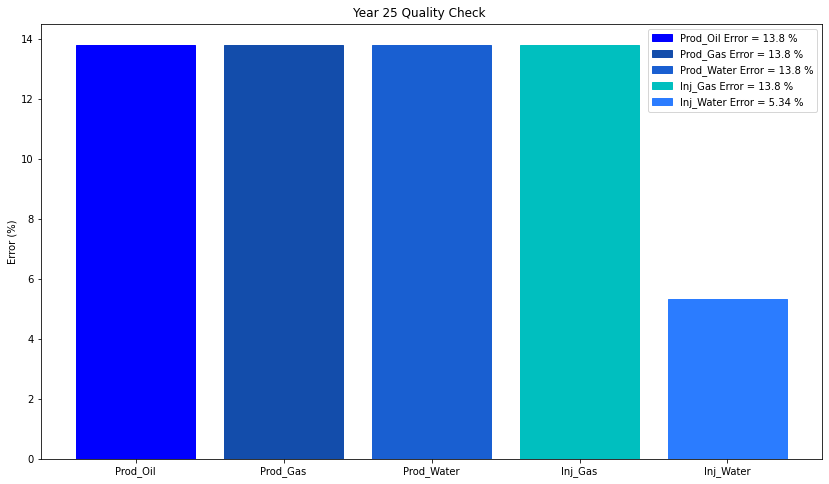

In [59]:
fig = plt.figure(figsize=(14,8))

x = ['Prod_Oil', 'Prod_Gas','Prod_Water','Inj_Gas','Inj_Water']
bar = plt.bar(x, year25)

axes = plt.gca()
axes.set_ylabel('Error (%)')
plt.suptitle('Year 25 Quality Check', y=0.91)  

colors = {
     'Prod_Oil Error = '+str(round(year25[0],2))+' %':'b', 'Prod_Gas Error = '+str(round(year25[1],2))+' %':'#134dab',
     'Prod_Water Error = '+str(round(year25[2],2))+' %':'#195fd1','Inj_Gas Error = '+str(round(year25[3],2))+' %':'c',
     'Inj_Water Error = '+str(round(year25[4],2))+' %':'#2b7cff'
}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

bar[0].set_color('b')
bar[1].set_color('#134dab')
bar[2].set_color('#195fd1')
bar[3].set_color('c')
bar[4].set_color('#2b7cff')

plt.show() #plotting the results